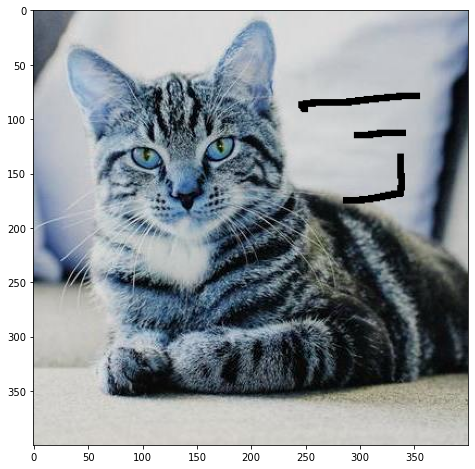

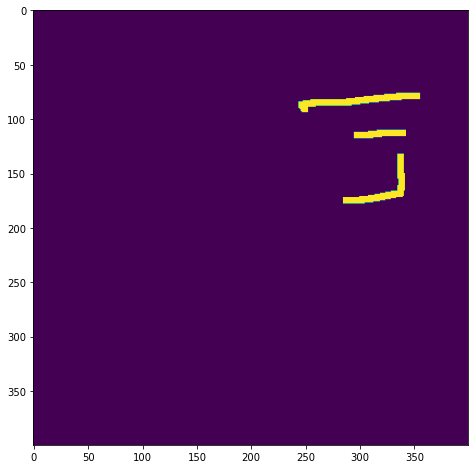

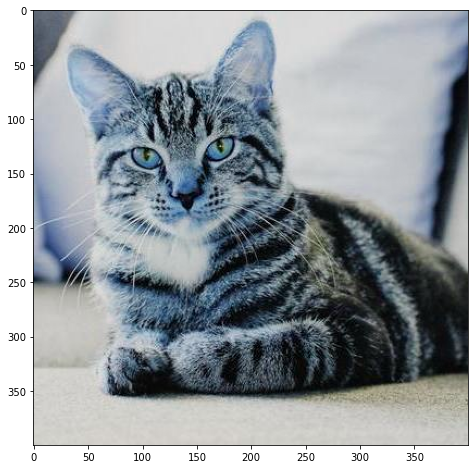

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#open the image
img=cv2.imread('dimage_damaged.png')
plt.imshow(img)
plt.show()
#load the mask
mask=cv2.imread('dimage_mask.png',0)
plt.imshow(mask)
plt.show()
#Inpaint
dst=cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)

#write the output
cv2.imwrite('dimage_inpainted.png',dst)
plt.imshow(dst)
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)



In [12]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')


In [14]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color



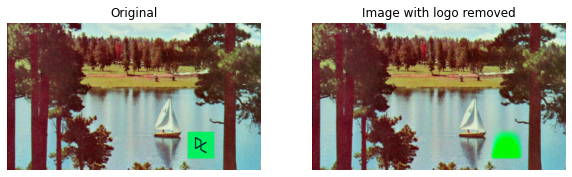

In [16]:
mage_with_logo=plt.imread('imlogo.png')

mask=np.zeros(image_with_logo.shape[:-1])

mask[210:272, 360:425]=1

image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,
                                              mask,
                                              multichannel=True)
plot_comparison(image_with_logo,image_logo_removed,'Image with logo removed')

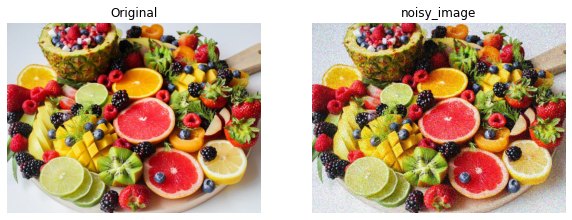

In [19]:
from skimage.util import random_noise
fruit_image=plt.imread('fruitts.jpeg')

noisy_image=random_noise(fruit_image)
plot_comparison(fruit_image,noisy_image,'noisy_image')

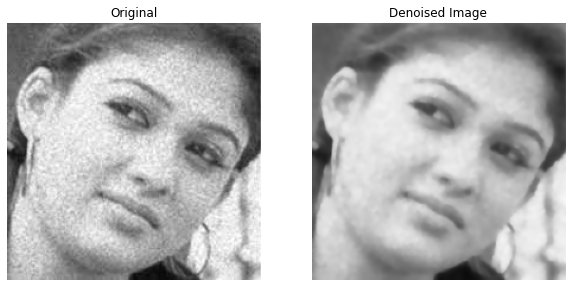

In [23]:
from skimage.restoration import denoise_tv_chambolle
noisy_image=plt.imread('noisy.jpg')
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)
plot_comparison(noisy_image,denoised_image,'Denoised Image')

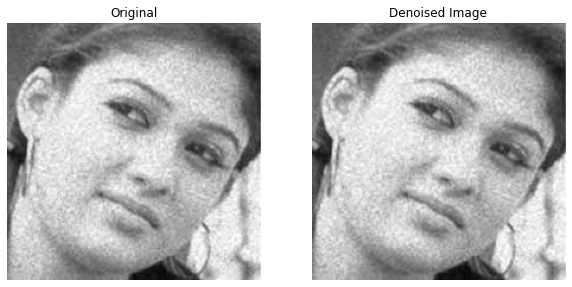

In [25]:
from skimage.restoration import denoise_bilateral

landscape_image=plt.imread('noisy.jpg')

denoised_image=denoise_bilateral(landscape_image,multichannel=True)

plot_comparison(landscape_image,denoised_image,'Denoised Image')

<ipython-input-32-fb0ff7281c3b>:7: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(face_image,n_segments=400)
<ipython-input-32-fb0ff7281c3b>:9: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,face_image,kind='avg')


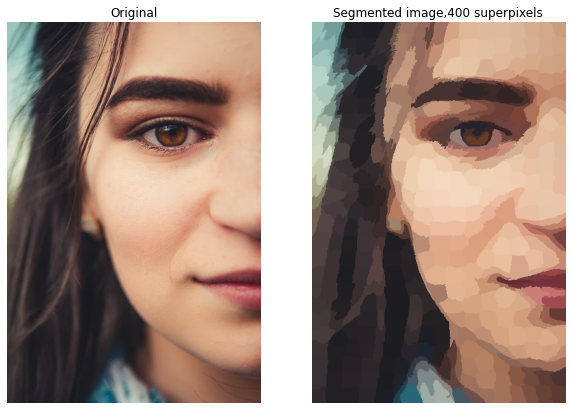

In [32]:
from skimage.segmentation import slic

from skimage.color import label2rgb

face_image=plt.imread('face.jpg')

segments=slic(face_image,n_segments=400)

segmented_image=label2rgb(segments,face_image,kind='avg')

plot_comparison(face_image,segmented_image,'Segmented image,400 superpixels')

In [35]:
def show_image_contour(image,contours):
    plt.figure()
    for n,contour in enumerate(contours):
        plt.plot(contour[:,1],contour[:,0],linewidth=3)
    plt.imshow(image,interpolation='nearest',cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

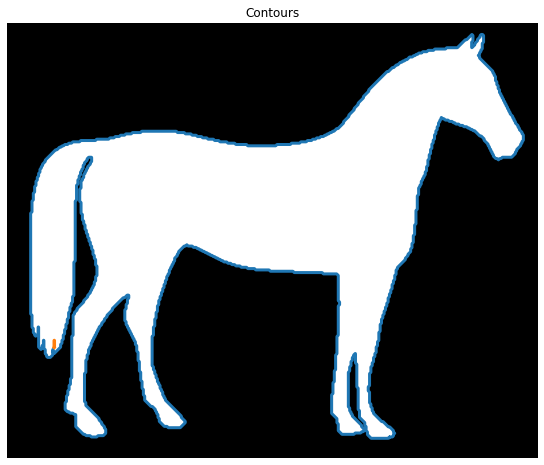

In [37]:
from skimage import measure,data
horse_image=data.horse()
contours=measure.find_contours(horse_image,level=0.8)
show_image_contour(horse_image,contours)